In [16]:
import matplotlib
matplotlib.use('Agg')
from datascience import Table, predicates
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def checker(strong, positive):
    if strong:
        if positive:
            print("Try Again!")
        else:
            print("You are correct! You now know how to make and read scatterplots to analyze trends in data!")   
    else:
        print("Try Again!")

# Lesson 8: Correlation

In our last notebook, we learned how to use the power of programming to visualize data. But that's not all we can do with these Python libraries. Today we'll take our programming toolkit one step further and see how we can use the same libraries to calculate numerical information about our data after we've plotted it. Visualizations and numerical information together can tell us  detailed stories about our data and what it means.

We'll begin by using matplotlib - the same library we used to make line graphs, bar graphs, and pie charts - to explore the process of visualizing data using scatter plots. We'll then see how we can use another powerful library called numpy to numerically investigate the relationships between variables in our data by computing correlation coefficients. Finally we'll also look into plotting lines of best fit as an introduction to the concept of regression.

## Scatterplots

Remember from today's lesson that when we have data about two variables, the best way to visualize it is through something called a "scatterplot." We can use our handy datascience library to quickly make lots of scatterplots.

Let's start with the example of clasroom participation from the lesson. Below we'll create a new Table using that data and then use the datascience ".scatter('Column Name 1', 'Column Name 2')" function to create a scatterplot.

In [3]:
classroom_participation = Table().with_columns([
    'Student',['Sathvik','Anjali', 'Shreyan','Chaaru','Rishi','Divya'],
    '1st Week', [3,1,1,2,2,3],
    '12th Week', [7,2,4,5,6,5]
])
classroom_participation

Student,1st Week,12th Week
Sathvik,3,7
Anjali,1,2
Shreyan,1,4
Chaaru,2,5
Rishi,2,6
Divya,3,5


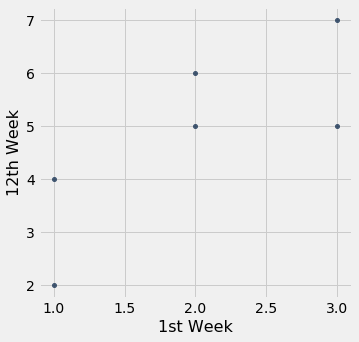

In [4]:
classroom_participation.scatter('1st Week', '12th Week')

Scatterplots are useful for illustrating "trends" in our data. As we can see from this scatterplot, students who tended to participate less in the first week also tended to participated less in the twelfth week - like Anjali for example, who participated the least out of all the students in the 1st and 12th weeks. Similarly, students who tended to particpate more in the first week also participated more in the twelfth week. This is exactly what we mean by a trend. 

This is an example of a "weak positive" correlation. It's weak because the data points don't form exactly a straight line, and it's positive because the data points rougly go from the bottom left to the top right in our scatterplot (positive slope). Now let's look at another example. Fill in the following cells to make a scatter plot of classroom absences vs. final grade in the class.

In [5]:
student_abscences = Table().with_columns([
    'Student',['Rashi','Amit', 'Simaran','Shruti','Eesha','Arpit'],
    'Absences', [0,1,2,3,4,7],
    'Grades', [99,95,90,80,75,68]
])
student_abscences

Student,Absences,Grades
Rashi,0,99
Amit,1,95
Simaran,2,90
Shruti,3,80
Eesha,4,75
Arpit,7,68


In [6]:
student_abscences.scatter(    ) # fill in this line to make the scatterplot

TypeError: scatter() missing 1 required positional argument: 'column_for_x'

Is this data strongly or weakly correlated? And is the correlation positive or negative? Put your answers in the cell below and run it to find out if you're right!

In [7]:
strong =     # put True here if you think it's a strong correlation and False if it's weak
positive =     # put True here if you think the data is positively correlated, and False if it's negatively correlated

checker(strong, positive)

SyntaxError: invalid syntax (<ipython-input-7-cb8d125b8c16>, line 1)

## Correlation Coefficients

Scatterplots can tell us a lot about trends in our data, but just knowing whether our data is strongly or weakly correlated and whether the correlation is positive or negative isn't enough. You might ask yourself, "How strong is  the correlation? Are some correlations stronger than others?"

This is where the idea of a correlation coefficient comes in. The correlation coefficient is a number, known as r, between -1 and 1 that can be calculated for any two variables. If r is negative the correlation is negative, and if it's positive the correlation is positive. And the "magnitude" of r (in other words, how close |r| is to 1) tells us how strong the correlation is.

In the following cells, we'll walk you through an example of calculating the correlation coefficient for a dataset. For our dataset, let's take a look at some data we first saw all the way back in lesson 1. We'll use the datascience library to create a Table with fertility, population, life expectancy, and child mortality data for all the countries in the world for the year 2015.

In [8]:
fertility_data = Table.read_table('fertility.csv').where('time', 2015).drop("time")
population_data = Table.read_table('population.csv').where('time', 2015).drop("time")
life_expectancy_data = Table.read_table('life_expectancy.csv').where('time', 2015).drop("time")
child_mortality_data = Table.read_table('child_mortality.csv').where('time', 2015).drop("time")

joined_data = fertility_data.join("geo", population_data)\
                            .join("geo", life_expectancy_data)\
                            .join("geo", child_mortality_data)
joined_data = joined_data.relabeled("children_per_woman_total_fertility", "fertility")\
                        .relabeled("population_total", "population")\
                        .relabeled("life_expectancy_years", "life expectancy")\
                        .relabeled("child_mortality_0_5_year_olds_dying_per_1000_born", "child mortality")
joined_data

geo,fertility,population,life expectancy,child mortality
abw,1.66,103889,75.72,16.57
afg,4.47,32526562,53.8,91.1
ago,5.65,25021974,59.6,156.9
alb,1.78,2896679,78,14
are,1.77,9156963,75.4,6.8
arg,2.15,43416755,76.5,12.5
arm,1.41,3017712,74.7,14.2
atg,2.06,91818,76.4,8.1
aus,1.88,23968973,82.3,3.5
aut,1.5,8544586,81.3,3.5


Let's take a look at the "child mortality" and "life expectancy" columns. We'd expect these two be negatively correlated since the higher the risk of dying as a child, the lower your expected lifetime should be. We can see if this trend holds true by first plotting the data.

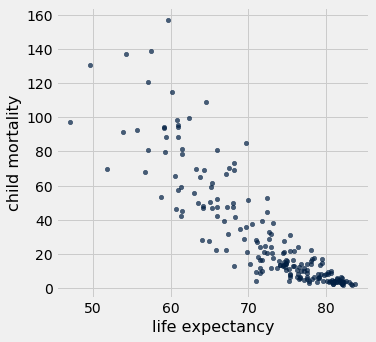

In [9]:
joined_data.scatter("life expectancy", "child mortality")

Yup, in fact the data seems negatively correlated. How strong is the correlation exactly? Well to answer that let's compute the correlation coefficient, using the numpy library. First, let's get the two columns we want.

In [10]:
life_expectancy = joined_data.column("life expectancy")
child_mortality = joined_data.column("child mortality")

Remember that the next step in computing the correlation coefficient is calculating the mean and standard deviation of our two variables. Numpy lets us do this with the convenient "np.mean" and "np.std" functions. Here's how to use them.

In [11]:
avg_life_expectancy = np.mean(life_expectancy)
stddev_life_expectancy = np.std(life_expectancy)
avg_child_mortality = np.mean(child_mortality)
stddev_child_mortality = np.std(child_mortality)

The next step is to transform the data by calculating z_x = (x - x_mean)/x_stddev and z_y = (y - y_mean)/y_stddev for each x and y value, then multiplying together to get z_x * z_y. We can use the numpy "subtract," "divide," and "multiply" functions for this.

In [12]:
transformed_life_expectancy = np.divide(np.subtract(life_expectancy, avg_life_expectancy), stddev_life_expectancy)
transformed_child_mortality = np.divide(np.subtract(child_mortality, avg_child_mortality), stddev_child_mortality)
products = np.multiply(transformed_life_expectancy, transformed_child_mortality)

Finally, we add up the values in this array and divide by n-1, where n is the number of values, to get the final correlation coefficient.

In [13]:
correlation_coefficient = np.sum(products) / (len(products) - 1)
print("This is the correlation coefficient: ", correlation_coefficient)

This is the correlation coefficient:  -0.876785711187


As you can see the correlation coefficient is negative and very close to -1, indicating that this is a strong negative correlation as expected. 

Now it's your turn. Let's take a look at another pair of variables: fertility and population. Fill in the following cells to make the scatterplot.

In [ ]:
joined_data.scatter(    ) # fill this in to get a scatterplot of fertility vs population

Note that this scatterplot has 2 big "outliers" in the top left of the graph, whose populations are far greater than the rest of the data points (India and China). In order to see any relationship in the scatterplot that may be obscured by these outliers, let's use a call to "where" to get rid of these 2 outliers and redo the scatterplot. Fill in the following cell to do this.

In [ ]:
joined_data = joined_data.where("population", predicates.are.below(1e9))
joined_data.scatter(    ) # fill this in to get a scatterplot of fertility vs population without outliers

Now guess whether the correlation is strong or weak, and if it's positive or negative. Then fill in the following cells to find out if you're right by computing the correlation coefficient!

In [ ]:
fertility = joined_data.column(    )
population = joined_data.column(    )

avg_fertility = 
stddev_fertility = 
avg_population = 
stddev_population = 

transformed_fertility = np.divide(np.subtract(    ),    )
transformed_population = np.divide(np.subtract(    ),    )
products = 

correlation_coefficient = np.sum(    ) / (    )
print("This is the correlation coefficient: ", correlation_coefficient)

A much quicker way to compute the correlation coefficient is to use the np.corrcoef() function. To check if you filled in the previous cells correctly and found the right value, run the next cell to see the right answer.

In [52]:
print("This is the correlation coefficient: ", 
      np.corrcoef(joined_data.column("population"), joined_data.column("fertility"))[1,0])

This is the correlation coefficient:  -0.0583302137464


## Line of Best Fit

The last thing you learned about correlation is the idea of a line of best fit. This is a line that roughly "fits" the data by describing the ideal linear relationship between the data points. Luckily we can plot lines of best fit easily using the datascience library by adding an additional argument, "fit_line = True", to our call to the scatter function. Here's an example.

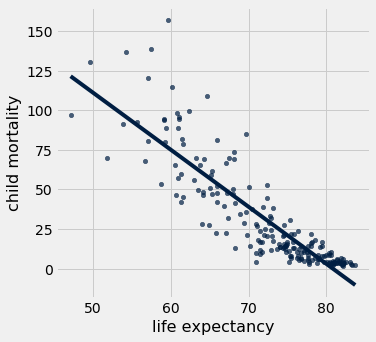

In [53]:
joined_data.scatter("life expectancy", "child mortality", fit_line=True)

When the data is strongly correlated (correlation coefficient close to 1 or -1), the line closely fits most of the data points well. But when the data is not strongly correlated (correlation coefficient close to 0), the lie of best fit doesn't seem to fit the data at all. Let's see what the line of best fit looks like for population and fertility. Fill in the following cell to create a scatterplot of population and fertility with a best fit line.

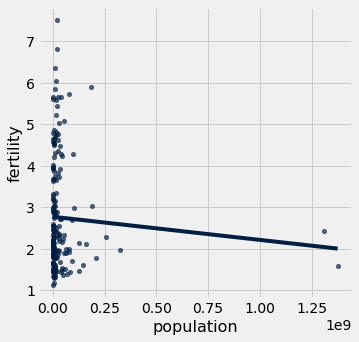

In [54]:
joined_data.scatter(    ) # fill this in

In the next lesson, we'll learn how to actually mathematically find the equation for this line of best fit by using a technique known as "regression."